In [22]:
import pandas as pd
import nltk
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('C:/Users/rissu/Hotel_Reviews.csv')

In [3]:
data.shape

(515738, 17)

In [4]:
data.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968


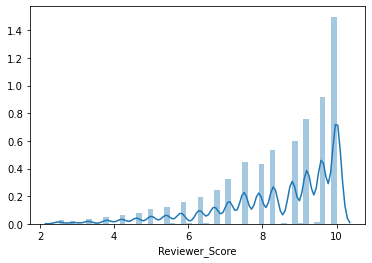

In [5]:
sns.distplot(data['Reviewer_Score'])

In [6]:
data_neg=data.iloc[:,6]
data_pos=data.iloc[:,9]
data_neg=pd.DataFrame({"Data":data_neg,
                       "Status":np.zeros(515738).astype(int)})
data_pos=pd.DataFrame({"Data":data_pos,
                       "Status":np.ones(515738).astype(int)})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
df=pd.concat([data_pos,data_neg])

In [9]:
df.shape

(1031476, 2)

In [11]:
df

,Data,Status
0,Only the park outside of the hotel was beauti...,1
1,No real complaints the hotel was great great ...,1
2,Location was good and staff were ok It is cut...,1
3,Great location in nice surroundings the bar a...,1
4,Amazing location and building Romantic setting,1
...,...,...
515733,no trolly or staff to help you take the lugga...,0
515734,The hotel looks like 3 but surely not 4,0
515735,The ac was useless It was a hot week in vienn...,0
515736,No Negative,0


In [12]:
X_train,X_test,y_train,y_test=train_test_split(df['Data'],df['Status'])

<IPython.core.display.Javascript object>

In [21]:
tf=TfidfVectorizer(stop_words='english',max_df=0.7)
tf_train=tf.fit_transform(X_train)
tf_test=tf.transform(X_test)

In [23]:
logistic=LogisticRegression(max_iter=1000)
logistic.fit(tf_train,y_train)
logistic.score(tf_train,y_train),logistic.score(tf_test,y_test)

(0.9363514032318736, 0.9330629117885438)

In [70]:
String=np.array(["I will never look back to such place. It was hilarious and disgusting"])
prdct=tf.transform(String)
logistic.predict(prdct)

<IPython.core.display.Javascript object>

array([0])

In [76]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
stemmer=LancasterStemmer()
from sklearn.feature_extraction.text import CountVectorizer

In [75]:
nltk.word_tokenize('hello how can u do that tho me')

['hello', 'how', 'can', 'u', 'do', 'that', 'tho', 'me']

In [262]:
temp=pd.DataFrame({
    'A':
     ['This is the first document',
     'This document is the second document.',
     'And this is the third one.',
     'Is this the first document?',]
}
)
temp

,A
0,This is the first document
1,This document is the second document.
2,And this is the third one.
3,Is this the first document?


In [274]:
temp=df.copy()

In [ ]:
temp2=temp.copy()
tem

In [297]:
stop_words=set(stopwords.words('english'))
words=['?','.',',']
total=[]
def convert(temp):
    strip_special_char=re.compile("[^A-Za-z0-9]+")
    for i in range(len(temp)):
        data=temp.iloc[i,:1].str.split(' ').astype('O')[0]
        data=[i for i in data if i.lower() not in stop_words]
        data=' '.join(data)
        text=re.sub(strip_special_char," ",data.lower())
        total.append(text)
#       print(data)
convert(temp)

In [335]:
total

[' park outside hotel beautiful ',
 ' real complaints hotel great great location surroundings rooms amenities service two recommendations however firstly staff upon check confusing regarding deposit payments staff offer upon checkout refund original payment make new one bit confusing secondly site restaurant bit lacking well thought excellent quality food anyone vegetarian vegan background even wrap toasted sandwich option would great aside minor minor things fantastic spot back return amsterdam ',
 ' location good staff ok cute hotel breakfast range nice go back ',
 ' great location nice surroundings bar restaurant nice lovely outdoor area building also quite character ',
 ' amazing location building romantic setting ',
 ' good restaurant modern design great chill place great park nearby hotel awesome main stairs ',
 ' room spacious bright hotel located quiet beautiful park ',
 ' good location set lovely park friendly staff food high quality oth enjoyed breakfast ',
 'positive',
 ' ro

In [381]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X,y=shuffle(total,temp['Status'])

In [382]:
y

165379    0
487159    0
310075    1
31578     0
33726     1
         ..
496797    1
494536    1
183206    0
419577    0
454599    0
Name: Status, Length: 1031476, dtype: int32

(1031476,)

In [373]:
len(y)

1031476

In [374]:
temp.iloc[95904,:]

Data       Location is excellent
Status                         1
Name: 95904, dtype: object

In [351]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X_train).astype(np.int8)
X=X.toarray()
X

<IPython.core.display.Javascript object>

MemoryError: Unable to allocate 50.2 GiB for an array with shape (773607, 69636) and data type int8

In [300]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [301]:
len(total)

1031476

In [311]:
a=np.array([1,0,1,0])

<IPython.core.display.Javascript object>

In [316]:
a.astype(np.byte)

<IPython.core.display.Javascript object>

array([1, 0, 1, 0], dtype=int8)

In [332]:
a=np.random.randint(0,2,(4,5))
b=np.array([0,1,0,1]).reshape(-1,1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [347]:
a,b

(array([[0, 0, 0, 1, 0],
        [0, 1, 0, 1, 1],
        [1, 0, 1, 0, 0],
        [1, 0, 1, 0, 1]]),
 array([[0],
        [1],
        [0],
        [1]]))

In [343]:
X, y = shuffle(a, b, random_state=0)